# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [1]:
Pkg.update()
Pkg.add("DualNumbers")
#using Plots

INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Nothing to be done
INFO: Recompiling stale cache file /home/samuel/.julia/lib/v0.5/Calculus.ji for module Calculus.
INFO: Recompiling stale cache file /home/samuel/.julia/lib/v0.5/DualNumbers.ji for module DualNumbers.


In [1]:
using PyPlot
using DualNumbers

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

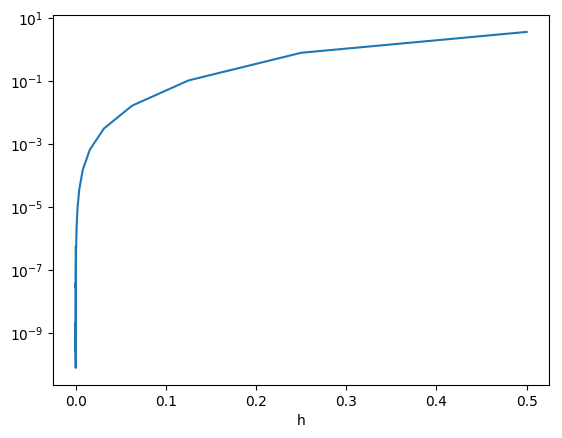

/home/samuel/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


30-element Array{Float64,1}:
 3.54188    
 0.773114   
 0.102735   
 0.016301   
 0.00307504 
 0.00065461 
 0.000150052
 3.58542e-5 
 8.75877e-6 
 2.16425e-6 
 5.37893e-7 
 1.3408e-7  
 3.34702e-8 
 ⋮          
 8.01945e-11
 1.2385e-10 
 7.35031e-10
 2.19022e-9 
 9.09654e-10
 2.545e-10  
 1.88376e-8 
 1.97689e-8 
 3.83954e-8 
 2.72195e-8 
 2.65638e-7 
 5.4876e-7  

In [2]:
f(x)=sin(exp(x))


function numdif(x,h)
    fs=(-3/2*f(x)+2*f(x+h)-1/2*f(x+2*h))/h
    #fs=(f(x+h)-f(x-h))/2*h
    return fs
end

numdif(1,0.1)

2.0^-1

a=zeros(30)

h=zeros(30)

for k=1:30
   a[k]=numdif(1,2.0^-k)
    h[k]=2.0^-k
end

b=e*cos(e)*ones(30)

error=abs(a-b)
relative_error=abs(error./b)

scaling=14*h.^2

semilogy(h,error)
#plot(h,log(error))
#plot(h,error,label="error")
# plot(h,relative_error,label="relative error")
# plot(h,scaling,label="scaling")
xlabel("h")
#ylabel("error")
legend()

log(error)

log(e)

error

In [6]:
x=Dual(1,1)
y=f(x)
println("f'(1) = ", dualpart(y))
z=abs(e*cos(e)-dualpart(y))
z
#eps(z)
#eps(0.0)

f'(1) = -2.478349732955235


0.0

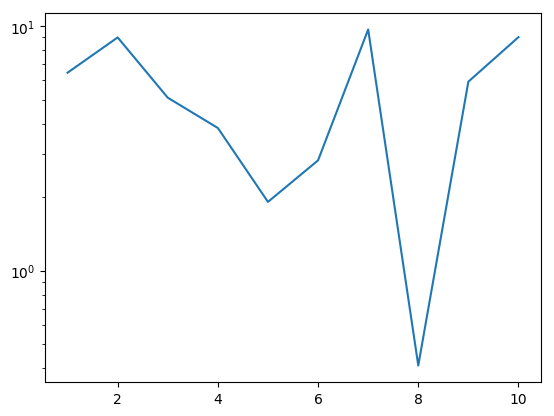

[6.45636,8.99895,5.1026,3.8363,1.91379,2.82916,9.69812,0.410304,5.93455,9.02296]

10-element Array{Float64,1}:
 0.0     
 0.30103 
 0.477121
 0.60206 
 0.69897 
 0.778151
 0.845098
 0.90309 
 0.954243
 1.0     

In [67]:
using Distributions
x=zeros(10)
y=zeros(10)
for i in 1:10
    x[i]=rand(Uniform(0,10))
    y[i]=log(10,i)
end
x

#plot(1:10,log(x))
semilogy(1:10,x)
print(x)
y



## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

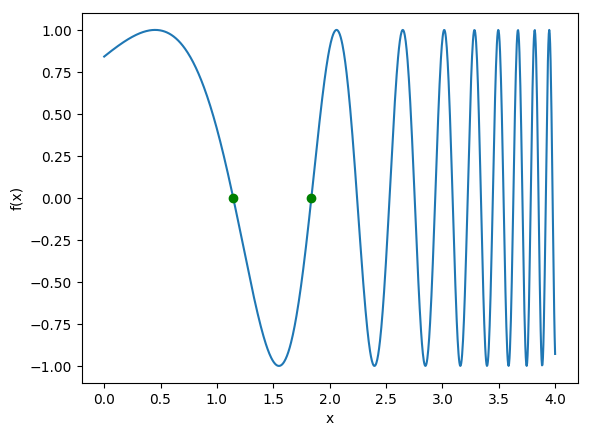

1.1447298858494002
1.8378770664093453


2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f04ffa9c9d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f04ffa9ce90>

In [22]:
println(log(pi))
println(log(2*pi))

x=linspace(0,4,1000)

plot(x,f(x))
xlabel("x")
ylabel("f(x)")
plot(log(pi),0,"o",color="green",log(2*pi),0,"o")

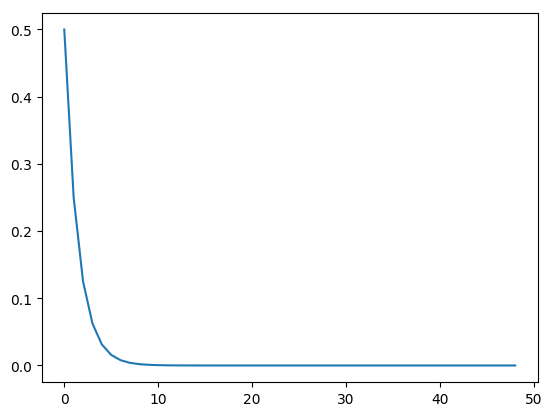

1.1447298858494
1.1447298858494008


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f429a76b590>

In [25]:
a=1
b=1.5

n=15
tol=10.0^-n

error=[]

while abs(b-a)>tol
    error=vcat(error,b-a)
    x=(a+b)/2
    if f(a)*f(x)<0
        a=a
        b=x
    else
        a=x
        b=b
    end
end

println(a)
println(b)

plot(error)

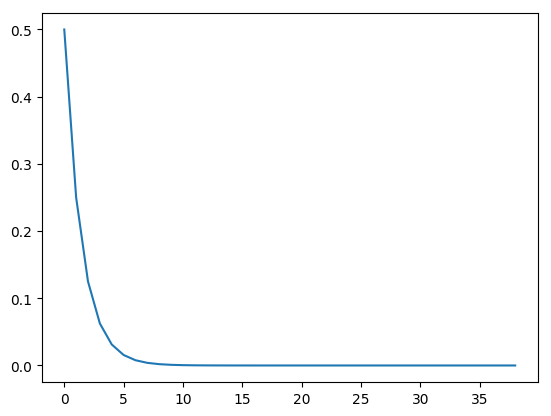

1.1447298858493014
1.1447298858502108


0.000623652

In [32]:
a=1
b=1.5

n=12
tol=10.0^-n

error=[]

function f(a,b,error)
    while abs(b-a)>tol
        error=vcat(error,b-a)
        x=(a+b)/2
        if f(a)*f(x)<0
            a=a
            b=x
        else
            a=x
            b=b
        end
    end
   return a,b,error
end

#@timed(f(a,b,error))



plot(f(a,b,error)[3])

println(f(a,b,error)[1])
println(f(a,b,error)[2])

@timed(f(a,b,error))[2]


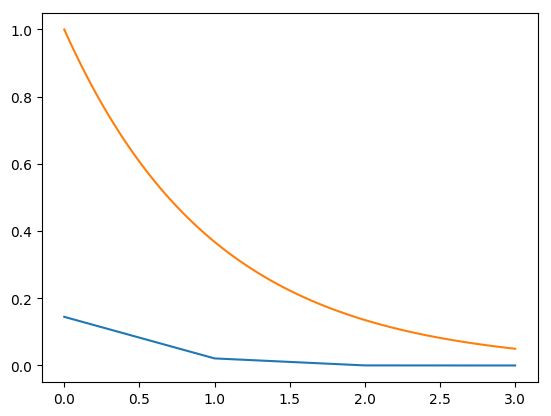

1.1447298858494004

In [51]:
derivf(x)=exp(x)*cos(exp(x))

n=15
tol=10.0^-n

x=1

x_s=log(pi)

error=[]
while abs(f(x))>tol
    error=vcat(error,abs(x-x_s))
    x=x-f(x)/derivf(x)
end

x
plot(error)
x_1=linspace(0,3,100)
plot(x_1,exp(-x_1))

error
x

In [30]:
a=[]
vcat(a,3)

function g(x,y)
    return x,y
end

g(1,2)[2]
@timed(g(1,2))

((1,2),1.599e-6,192,0.0,Base.GC_Diff(192,0,0,5,0,0,0,0,0))

## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.

In [2]:
println(log(pi/2))
println(log(3*pi/2))

0.4515827052894548
1.5501949939575645


In [1]:
a=1.5
b=1.7
phi=(1+sqrt(5))/2

n=4

tol=10.0^-n

x_s=log(3*pi/2)


while abs(x-x_s)>tol
    x=a+(b-a)/phi
    c=b-(b-a)/phi
    
    
    

1.618033988749895